### En esta practica trabajamos con dos tipos de bases de datos. La base de datos de criticas de vinos, y la de resultados de analisis de cancer de mama en mamografias. Las tareas a realizar son:

Tomar de referencia la practica 1, tomar solo UNA de las bases de datos y aplicar los metodos de analisis inicial de datos para describir la base de datos (Las columnas, tipos de datos, etc.)

In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
bdvinos= pd.read_csv("C:\\Users\\carlm\\Desktop\\mineriaDeDatos\\MINERIA-DE-DATOS\\Practica2\\winemag-data_first150k.csv",index_col=0)

In [4]:
bdvinos.shape

(150930, 10)

In [5]:
bdvinos.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
bdvinos.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [41]:
bdvinos.min()

points    80.0
price      4.0
dtype: float64

In [43]:
bdvinos.max()

points     100.0
price     2300.0
dtype: float64

In [7]:
bdvinos.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [8]:
bdvinos.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

Dar una descripcion estadistica basica (la primer parte de la practica, medias, covarianza, desviacion estandar, etc) de los datos de las columnas que a tu criterio ayudaran a entender mejor tus datos.

In [9]:
bdvinos['country'].count()

150925

In [10]:
bdvinos['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [11]:
bdvinos['points'].describe()

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

Utilizar al menos dos formas de graficar con matplotlib y dos de seaborn para iniciar un analisis estadistico. (En total son 4 graficas las que tienen que hacer).

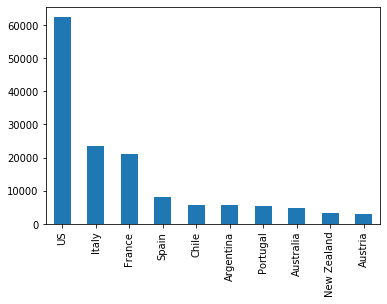

In [27]:
bdvinos['country'].value_counts().head(10).plot.bar()

En la grafica de arriba podemos ver las frecuencias de las cirticas en cada uno de los paises.

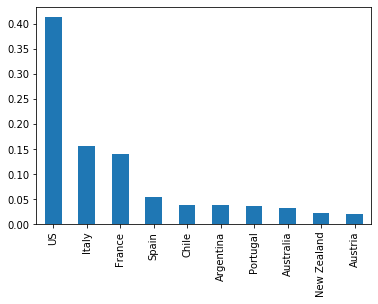

In [26]:
(bdvinos['country'].value_counts().head(10) / len(bdvinos)).plot.bar()

En la grafica de arriba podemos los precios de los vinos que manejan en cada uno de los paises

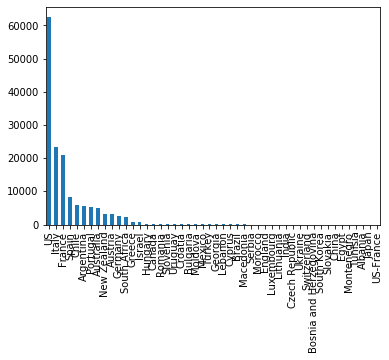

In [68]:
bdvinos['country'].value_counts().plot.bar()

En la grafica de ariba podemos ver las frecuencias de criticas que tiene cada uno de los paises.

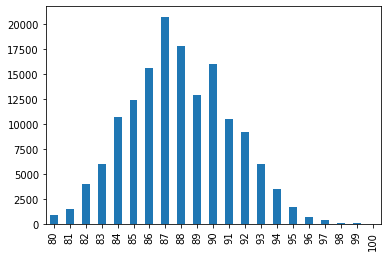

In [70]:
bdvinos['points'].value_counts().sort_index().plot.bar()

La grafica de ariba muestra la frecuencia en la que se optienen las calificaciones de las criticas.

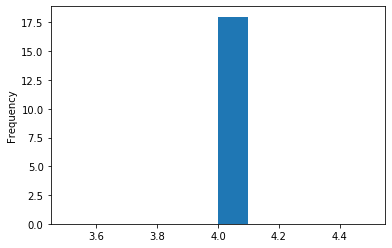

In [46]:
bdvinos[bdvinos['price'] == 4]['price'].plot.hist()

En la grafica de ariba podemos ver la frecuencia de que un vino cueste 4.

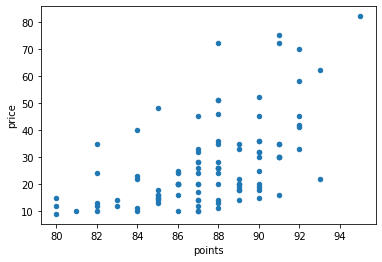

In [49]:
bdvinos[bdvinos['price'] < 100].sample(100).plot.scatter(x='points', y='price')

En la grafica de arriba podmeos los puntos que se optienen segun el precion, en una muestra de 100.

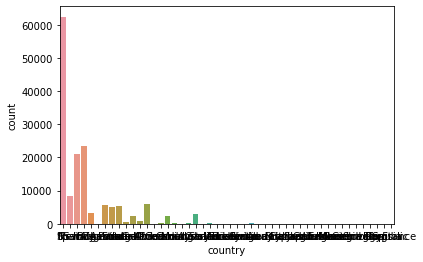

In [53]:
sns.countplot(bdvinos['country'])

Con seaborn podemos hacer graficas mas presentables, en la grafica de ariba podemos ver las frecuencias de las criticas de los paises.

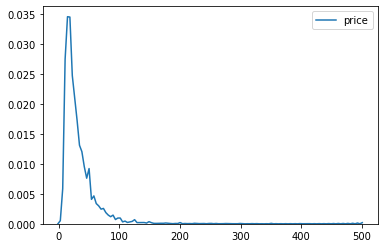

In [58]:
sns.kdeplot(bdvinos.query('price < 500').price)

En la grafica de ariba podemos ver el uso de intervalos para representar los precios.

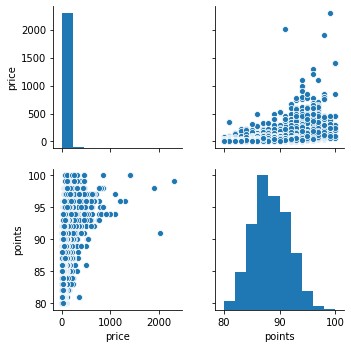

In [63]:
sns.pairplot(bdvinos[['price', 'points']])

En la grafica de ariba podemos ver una cobinacion de histogramas y graficas de puntos , entre el precio y los puntos de los vinos.

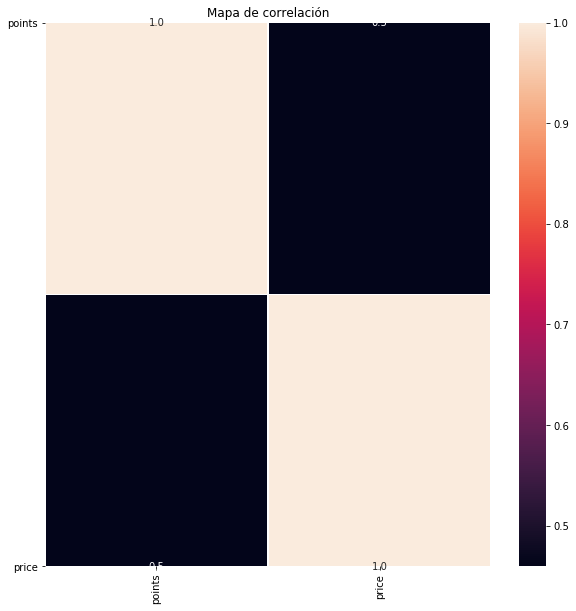

In [67]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(bdvinos.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

En la grafica de arriba no se lo que este sucediendo,pero se ve con ganas :V

# Pregunta 1
Que representan los datos de la grafica de arriba.
Representan las freceuncuas y las probabilidades que tienen los datos que estan las columnas.